In [76]:
your_local_path='C:/Users/ohm/Downloads/Machine Learning Exercises/Logistic_regression_casestudy/Logistic_Regression_Case_study/'

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
credit_def=pd.read_csv(your_local_path+'default.csv')
credit_def.sample(10)

,default,student,balance,income
8082,No,No,1491.479282,54835.770051
3304,No,No,1249.354139,52232.251188
1548,Yes,No,1532.326300,42152.361713
6589,No,No,927.468685,44308.282324
5107,No,No,946.398167,30770.066730
1955,No,No,181.919779,37725.247355
208,No,No,746.229775,35159.850229
5004,No,No,326.873676,48756.027580
6514,No,No,1304.068285,26219.323145
8139,No,Yes,1901.653755,21323.163266


In [78]:
credit_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [79]:
credit_def.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


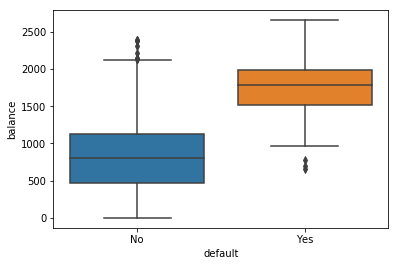

In [80]:
sns.boxplot(y='balance',x='default',data=credit_def)
plt.show()

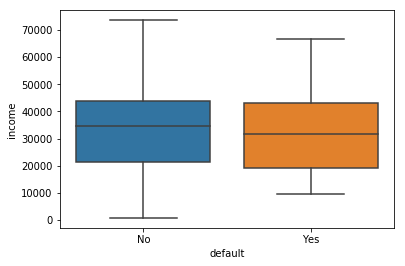

In [81]:
sns.boxplot(x='default',y='income',data=credit_def)
plt.show()

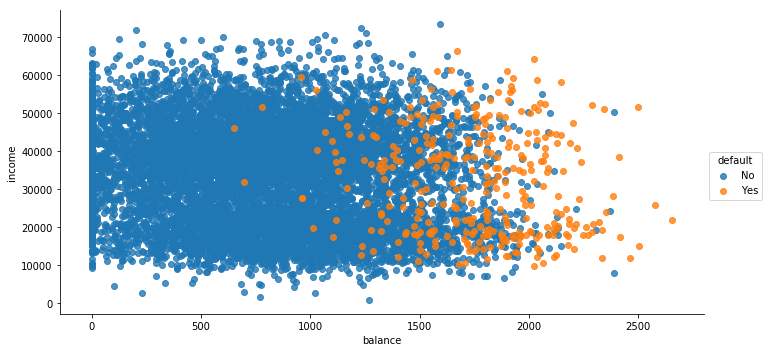

In [82]:
sns.lmplot(x='balance', y='income', hue = 'default', data=credit_def, aspect=2, fit_reg = False,ci=None)
plt.show()

In [83]:
# Create default dummy variable
def_dummies=pd.get_dummies(credit_def.default,prefix='default')
def_dummies.sample(5)

,default_No,default_Yes
5667,1,0
7954,1,0
1042,1,0
471,1,0
8184,1,0


In [84]:
def_dummies.drop(def_dummies.columns[0],axis=1,inplace=True)
def_dummies.sample(5)

,default_Yes
1678,0
8776,0
6821,0
8086,0
2921,0


In [85]:
credit_def=pd.concat([credit_def,def_dummies],axis=1)
credit_def.sample(5)

,default,student,balance,income,default_Yes
8666,No,Yes,1134.696572,20068.018546,0
8411,No,No,801.802712,46182.257098,0
2070,No,Yes,1455.684182,14822.833057,0
4428,No,No,536.214278,47956.524556,0
4550,No,No,381.520969,31750.777324,0


In [86]:
pd.crosstab(credit_def['default'],credit_def['student'],rownames=['Default'],colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


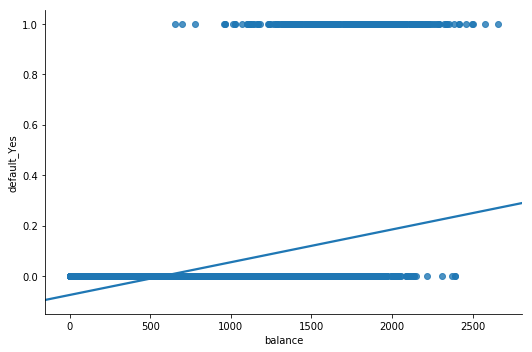

In [87]:
# Try simple linear regression on the data
sns.lmplot(x='balance', y='default_Yes', data=credit_def, aspect=1.5, ci = None, fit_reg = True)
plt.show()

In [88]:
#splitting the independent and dependent attributes
student_dummies = pd.get_dummies(credit_def.student,prefix='student')
student_dummies.sample(5)
credit_def=pd.concat([credit_def,student_dummies],axis=1)
credit_def.sample(5)
y = credit_def['default_Yes']
X= credit_def[['balance','income','student_Yes']]

print(X.head())
print(y.head())

       balance        income  student_Yes
0   729.526495  44361.625074            0
1   817.180407  12106.134700            1
2  1073.549164  31767.138947            0
3   529.250605  35704.493935            0
4   785.655883  38463.495879            0
0    0
1    0
2    0
3    0
4    0
Name: default_Yes, dtype: uint8


In [89]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [90]:
# Build logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression(C=1e42)

In [91]:
# Using training dataset train the machine
logreg.fit(X_train,y_train)
print(logreg.coef_)
print(logreg.intercept_)

[[ 4.75685056e-04 -1.28330293e-04 -2.20224219e-06]]
[-1.73697617e-06]


In [92]:
# Now using test data, predict the value of y, ie default or not
y_pred_test=logreg.predict_proba(X_test)

def get_probability(y_test):
    y_pred=pd.DataFrame({'original':y_test,'probability':y_pred_test[:,1]})
    return y_pred
y_pred=get_probability(y_test)


In [93]:
y_pred.sample(10)

,original,probability
6073,0,0.001796
6718,0,0.340883
9519,0,0.003025
2991,0,0.000796
3544,0,0.017866
8483,0,0.085568
5213,0,0.019999
3742,0,0.001964
1199,0,0.057631
1430,0,0.019701


In [94]:
# Define Threshold and check accuracy for different values
def threshold(cutoff):
   y_pred['predicted']=y_pred.probability.map(lambda x:1 if x > cutoff else 0) 
   return metrics.accuracy_score(y_pred.original,y_pred.predicted)
print(threshold(0.4))
print(threshold(0.5))
print(threshold(0.6))
print(threshold(0.7))


0.9653333333333334
0.9683333333333334
0.9686666666666667
0.9686666666666667


In [95]:
#It seems the best threshold for our model is 0.6